## การเทรนโมเดลเพื่อตรวจจับและคัดกรองการสวมหน้ากาก ไม่สวมหน้ากาก

In [9]:
#https://www.youtube.com/watch?v=Ax6P93r32KU
#https://medium.com/ai-in-plain-english/blood-face-detector-in-python-part-1-machine-learning-and-deep-learning-classification-project-74aba7067e50
#http://gg.gg/oaqd6

#pip install imutils
# import imutils
# from imutils import perspective

import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [10]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4 #learning_rate=1e-4
EPOCHS = 20
BS = 32 #batch_size=32

DIRECTORY = 'dataset'
CATEGORIES = ["with_mask", "without_mask"]

In [11]:
DIRECTORY

'dataset'

In [12]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

[INFO] loading images...


c:\Users\Taechatuch\anaconda3\envs\mydata\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
data, labels

([array([[[-0.45098037, -0.49019605, -0.44313723],
          [-0.45098037, -0.49019605, -0.44313723],
          [-0.45098037, -0.49019605, -0.44313723],
          ...,
          [-0.41176468, -0.62352943, -0.75686276],
          [-0.41176468, -0.62352943, -0.75686276],
          [-0.41176468, -0.62352943, -0.75686276]],
  
         [[-0.45098037, -0.49019605, -0.44313723],
          [-0.45098037, -0.49019605, -0.44313723],
          [-0.45098037, -0.49019605, -0.44313723],
          ...,
          [-0.41176468, -0.62352943, -0.75686276],
          [-0.41176468, -0.62352943, -0.75686276],
          [-0.41176468, -0.62352943, -0.75686276]],
  
         [[-0.3960784 , -0.45098037, -0.3960784 ],
          [-0.3960784 , -0.45098037, -0.3960784 ],
          [-0.3960784 , -0.45098037, -0.3960784 ],
          ...,
          [-0.45098037, -0.62352943, -0.8039216 ],
          [-0.45098037, -0.62352943, -0.8039216 ],
          [-0.45098037, -0.62352943, -0.8039216 ]],
  
         ...,
  
        

In [14]:
# convert the data and labels to NumPy arrays
data = np.array(data, dtype="float32")
labels = np.array(labels)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, 
                                 test_size=0.20, stratify=labels, 
                                 random_state=42)

trainX.shape, testX.shape, trainY.shape, testY.shape

((3066, 224, 224, 3), (767, 224, 224, 3), (3066, 2), (767, 2))

In [15]:
trainX, testX 

(array([[[[-0.7490196 , -0.78039217, -0.7882353 ],
          [-0.7490196 , -0.78039217, -0.7882353 ],
          [-0.7490196 , -0.78039217, -0.7882353 ],
          ...,
          [-0.6784314 , -0.6862745 , -0.64705884],
          [-0.69411767, -0.7019608 , -0.6627451 ],
          [-0.69411767, -0.7019608 , -0.6627451 ]],
 
         [[-0.8117647 , -0.84313726, -0.8509804 ],
          [-0.8117647 , -0.84313726, -0.8509804 ],
          [-0.79607844, -0.827451  , -0.8352941 ],
          ...,
          [-0.6862745 , -0.69411767, -0.654902  ],
          [-0.7176471 , -0.7254902 , -0.6862745 ],
          [-0.7176471 , -0.7254902 , -0.6862745 ]],
 
         [[-0.81960785, -0.8509804 , -0.85882354],
          [-0.81960785, -0.8509804 , -0.85882354],
          [-0.8117647 , -0.84313726, -0.8509804 ],
          ...,
          [-0.70980394, -0.7176471 , -0.6784314 ],
          [-0.7254902 , -0.73333335, -0.69411767],
          [-0.7254902 , -0.73333335, -0.69411767]],
 
         ...,
 
         [[-

In [16]:
trainY, testY

(array([[1., 0.],
        [0., 1.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32))

In [17]:
# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [18]:
# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False,
			input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [19]:
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compiling model...


c:\Users\Taechatuch\anaconda3\envs\mydata\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [21]:
# train the head of the network
print("[INFO] training head...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Epoch 1/20
95/95 [==============================] - 207s 2s/step - loss: 0.4196 - accuracy: 0.8375 - val_loss: 0.1602 - val_accuracy: 0.9739
Epoch 2/20
95/95 [==============================] - 171s 2s/step - loss: 0.1591 - accuracy: 0.9618 - val_loss: 0.0806 - val_accuracy: 0.9844
Epoch 3/20
95/95 [==============================] - 180s 2s/step - loss: 0.1014 - accuracy: 0.9773 - val_loss: 0.0575 - val_accuracy: 0.9883
Epoch 4/20
95/95 [==============================] - 173s 2s/step - loss: 0.0712 - accuracy: 0.9796 - val_loss: 0.0494 - val_accuracy: 0.9896
Epoch 5/20
95/95 [==============================] - 179s 2s/step - loss: 0.0640 - accuracy: 0.9819 - val_loss: 0.0428 - val_accuracy: 0.9896
Epoch 6/20
95/95 [==============================] - 237s 3s/step - loss: 0.0572 - accuracy: 0.9838 - val_loss: 0.0430 - val_accuracy: 0.9896
Epoch 7/20
95/95 [==============================] - 169s 2s/step - loss: 0.0511 - accuracy: 0.9858 - val_loss: 0.0372 - val_accura

[INFO] evaluating network...
24/24 [==============================] - 32s 1s/step
              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       383
without_mask       0.99      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767

[[381   2]
 [  5 379]]


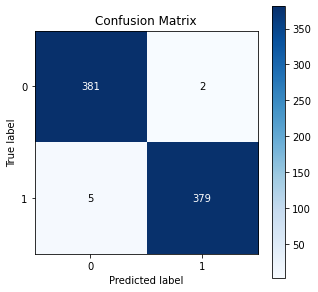

In [22]:
# make predictions on the testing set
from sklearn.metrics import confusion_matrix

print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
print(cm)

#pip install scikit-plot
import scikitplot as skplot 
plt.rcParams['figure.figsize'] = 5,5
skplot.metrics.plot_confusion_matrix(testY.argmax(axis=1), predIdxs)
plt.show()

In [23]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
model.save("FMD.model", save_format="h5")

[INFO] saving mask detector model...


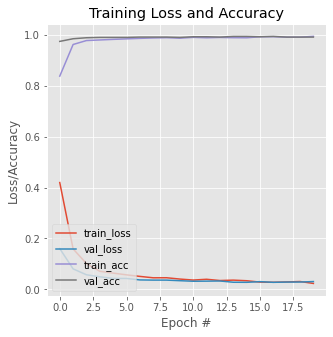

In [24]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

## การนำโมเดลไปทดสอบรูปสวมหน้ากาก ไม่สวมหน้ากาก (Testing Image)

In [25]:
# import the necessary packages
#conda install opencv
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
import os

In [26]:
# load our serialized face detector model from disk
prototxtPath = os.path.sep.join(['face_detector', "deploy.prototxt"])
weightsPath = os.path.sep.join(['face_detector', "res10_300x300_ssd_iter_140000.caffemodel"])

net = cv2.dnn.readNet(prototxtPath, weightsPath)

In [27]:
model=load_model('FMD.model')

image=cv2.imread('example_01.png')


(h,w) = image.shape[:2]


blob = cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))


net.setInput(blob)
detections=net.forward()

In [28]:
image, blob, h, w 

(array([[[186, 183, 145],
         [186, 184, 144],
         [186, 184, 144],
         ...,
         [223, 220, 215],
         [223, 220, 215],
         [223, 220, 215]],
 
        [[184, 183, 145],
         [184, 183, 145],
         [184, 183, 145],
         ...,
         [223, 220, 215],
         [223, 220, 215],
         [223, 220, 215]],
 
        [[182, 181, 146],
         [182, 181, 146],
         [183, 182, 144],
         ...,
         [223, 220, 215],
         [223, 220, 215],
         [223, 220, 215]],
 
        ...,
 
        [[ 90,  87,  77],
         [ 90,  87,  77],
         [ 91,  88,  78],
         ...,
         [106, 102,  96],
         [106, 102,  96],
         [106, 102,  96]],
 
        [[ 90,  87,  77],
         [ 91,  88,  78],
         [ 91,  88,  78],
         ...,
         [105, 101,  95],
         [105, 101,  95],
         [105, 101,  95]],
 
        [[ 90,  87,  77],
         [ 91,  88,  78],
         [ 91,  88,  78],
         ...,
         [104, 100,  94],
  

In [29]:
#loop over the detections
for i in range(0,detections.shape[2]):
    confidence=detections[0,0,i,2]
    
    
    if confidence>0.5:
        #we need the X,Y coordinates
        box=detections[0,0,i,3:7]*np.array([w,h,w,h])
        (startX,startY,endX,endY)=box.astype('int')
        
        #ensure the bounding boxes fall within the dimensions of the frame
        (startX,startY)=(max(0,startX),max(0,startY))
        (endX,endY)=(min(w-1,endX), min(h-1,endY))
        
        
        #extract the face ROI, convert it from BGR to RGB channel, resize it to 224,224 and preprocess it
        face=image[startY:endY, startX:endX]
        face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
        face=cv2.resize(face,(224,224))
        face=img_to_array(face)
        face=preprocess_input(face)
        face=np.expand_dims(face,axis=0)
        
        (mask,withoutMask)=model.predict(face)[0]
        
        #determine the class label and color we will use to draw the bounding box and text
        label='Mask' if mask>withoutMask else 'No Mask'
        color=(0,255,0) if label=='Mask' else (0,0,255)
        
        #include the probability in the label
        label="{}: {:.2f}%".format(label,max(mask,withoutMask)*100)
        
        #display the label and bounding boxes
        cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,color,2)
        cv2.rectangle(image,(startX,startY),(endX,endY),color,2)
        
        
        
#cv2.imshow("OutPut",image)
cv2.imshow("OutPut",image)
cv2.waitKey(0)
cv2.destroyAllWindows()


1/1 [==============================] - 1s 1s/step


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1267: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


## การนำโมเดลไปตรวจจับใบหน้าสวมหน้ากาก ไม่สวมหน้ากาก (Testing Video)

In [28]:
# import the necessary packages
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import imutils
import time
import cv2
import os

In [29]:
def detect_and_predict_mask(frame, faceNet, maskNet):
	# grab the dimensions of the frame and then construct a blob
	# from it
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (224, 224),
		(104.0, 177.0, 123.0))

	# pass the blob through the network and obtain the face detections
	faceNet.setInput(blob)
	detections = faceNet.forward()
	print(detections.shape)

	# initialize our list of faces, their corresponding locations,
	# and the list of predictions from our face mask network
	faces = []
	locs = []
	preds = []

	# loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]

		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > 0.5:
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

			# ensure the bounding boxes fall within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

			# extract the face ROI, convert it from BGR to RGB channel
			# ordering, resize it to 224x224, and preprocess it
			face = frame[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)

			# add the face and bounding boxes to their respective
			# lists
			faces.append(face)
			locs.append((startX, startY, endX, endY))

	# only make a predictions if at least one face was detected
	if len(faces) > 0:
		# for faster inference we'll make batch predictions on *all*
		# faces at the same time rather than one-by-one predictions
		# in the above `for` loop
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)

	# return a 2-tuple of the face locations and their corresponding
	# locations
	return (locs, preds)

In [30]:
prototxtPath=os.path.sep.join(['face_detector','deploy.prototxt'])
weightsPath=os.path.sep.join(['face_detector','res10_300x300_ssd_iter_140000.caffemodel'])
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

# load the face mask detector model from disk
maskNet = load_model("FMD.model")

In [31]:
# initialize the video stream
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()

# loop over the frames from the video stream
while True:
	# grab the frame from the threaded video stream and resize it
	# to have a maximum width of 400 pixels
	frame = vs.read()
	frame = imutils.resize(frame, width=400)

	# detect faces in the frame and determine if they are wearing a
	# face mask or not
	(locs, preds) = detect_and_predict_mask(frame, faceNet, maskNet)

	# loop over the detected face locations and their corresponding
	# locations
	for (box, pred) in zip(locs, preds):
		# unpack the bounding box and predictions
		(startX, startY, endX, endY) = box
		(mask, withoutMask) = pred

		# determine the class label and color we'll use to draw
		# the bounding box and text
		label = "Mask" if mask > withoutMask else "No Mask"
		color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

		# include the probability in the label
		label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

		# display the label and bounding box rectangle on the output
		# frame
		cv2.putText(frame, label, (startX, startY - 10),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
		cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

	# show the output frame
	cv2.imshow("Frame", frame)
	key = cv2.waitKey(1) & 0xFF

	# if the `q` key was pressed, break from the loop
	if key == ord("q"):
		break

# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

[INFO] starting video stream...
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 200, 7)
(1, 1, 2